In [1]:
#Perceptron Learning(single Layer Perceptron)

In [2]:
from sklearn import datasets

In [3]:
X,y=datasets.make_blobs(n_samples=150,n_features=2,centers=2,cluster_std=1.05,random_state=2)

In [4]:
y

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1])

Text(0.5, 1.0, 'Random Classification with 2 classes')

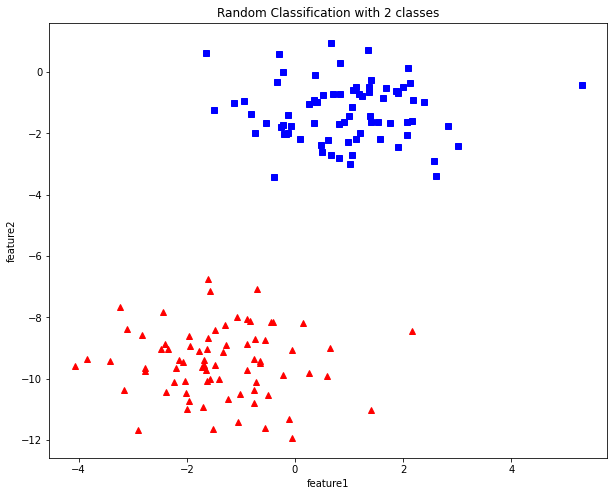

In [5]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,8))
plt.plot(X[:,0][y==0],X[:,1][y==0],'r^')
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.title('Random Classification with 2 classes')

In [6]:
def step_func(z):
    if(z>0):
        return 1.0
    else:
        return 0.0

In [7]:
import numpy as np

In [8]:
# This function is used to deploy perceptron learning the logic of weight updation rule will be implemented in the body of the function
# The data variables will be used as follows
# X=matrix of input features
#y-column of labe;s or target
# Lr-Learning rate
# epoch-number of iterations
# m-number of training samples
# n-number of features
# weights-connection weights
# n_mis_list-an array of mis classified examples
# connection weights

In [9]:
import numpy as np
def perceptron(X,y,lr,epochs):
    m,n=X.shape
    weights=np.zeros((n+1,1))
    n_miss_list=[]
    for epoch in range(epochs):
        n_miss=0
        for idx,x_i in enumerate(X):
            x_i=np.insert(x_i,0,1).reshape(-1,1)
            y_hat=step_func(np.dot(x_i.T,weights))
            if(np.squeeze(y_hat)-y[idx])!=0:
                weights+=lr*((y[idx]-y_hat)*x_i)
                n_miss+=1
        n_miss_list.append(n_miss)
    return weights,n_miss_list

In [10]:
def plot_decision_boundary(X,weights):
    x1=[min(X[:,0]),max(X[:,0])]
    m=-weights[1]/weights[2]
    c=-weights[0]/weights[2]
    x2=m*x1+c
    plt.plot(X[:,0][y==0],X[:,1][y==0],'r^')
    plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
    plt.xlabel("feature1")
    plt.ylabel('feature2')
    plt.title('Perceptron Learning')
    plt.plot(x1,x2,'y-')

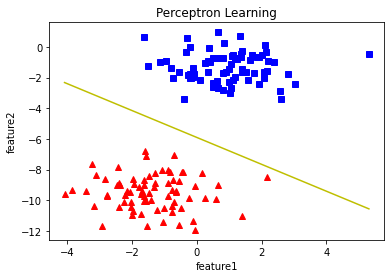

In [11]:
weights,miss_l=perceptron(X,y,0.5,100)
plot_decision_boundary(X,weights)

**viva questions for Practical**                                      
Functions used in the program                                                                                                  
1)make_blobs-This function is used to synthetically generate a dataset                                    
2)n_samples-is the total no of samples you want in the dataset,similarly                                  
3)n_features is the total no of input features                                                             
4)centres-represent the total no of grps,clusters or calsses you want                                          
5)np.zeros:this puthon function returns a new array of given shape and size filled with zeros                                
eg:np.zeros(5),will give ([0.,0.,0.,0.,0.])                                                        
eg:np.zero(2,1),will give([[0.],[0.]])                                                          
eg:np.zero(2,2) will give([[0.,0.][0.,0.]]                                                             
6)numpy.insert function:insert values along the given axis                                                    
eg-Suppose we have array A=[1,1],[2,2],[3,3] if we give the command np.insert (A,1,5,axis=1)then 5 will be inserted in the array A at column number 1                                                           
7)Re-shape:(-1,1)-Reshpe function is used to give a new shape to the numpy array.Numpy allows us to give one parameter in the reshape function as -1                                                             
eg-(2,-1)                                                                      
eg(-1,-1)not allowed                                                                  
-1 simply means unknown dimension but we want numpy to figure it out                                  
eg:z=[1,2,3,4],[5,6,7,8],[9,,10,11,12]                                                                 
z.reshape (-1) wil convert this array into a single row as follows,z=[1,2,3,4,5,6,7,8,9,10,11,12]                               
z.reshape(-1,1) will result in [1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12]                                           
8)numpy.squeeze function:is used when we want to remove single dimension entries from the shape of an array                    
suppose array A=[[[2,2,2],[2,2,2]]] and this function will reduce one dimension of the array.                          